In [32]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error

In [33]:
file_path = "day_2.csv"
df = pd.read_csv(file_path, delimiter=",")  

df.head()


,Unnamed: 0,year,sex,profession,income,age,gdp,avg_income_per_profession,percentage_of_workforce,gini,female_percentage,employment rate,average_age
0,0,0,F,civil servant,5131.08,40,947610.99,5357.960465,8.6,0.604055,0.468,0.516,33.516
1,1,0,M,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516
2,2,0,M,unemployed,124.10,25,947610.99,193.519318,8.8,0.604055,0.468,0.516,33.516
3,3,0,M,farmer,1868.39,36,947610.99,2182.726575,14.6,0.604055,0.468,0.516,33.516
4,4,0,F,child,0.00,1,947610.99,0.000000,24.8,0.604055,0.468,0.516,33.516


Predicted GDP for Year 1: 1005864.97
Predicted GDP for Year 2: 1005864.97
Predicted GDP for Year 3: 1005864.97
Predicted GDP for Year 4: 1005864.97
Predicted GDP for Year 5: 1005864.97


c:\Users\charl\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


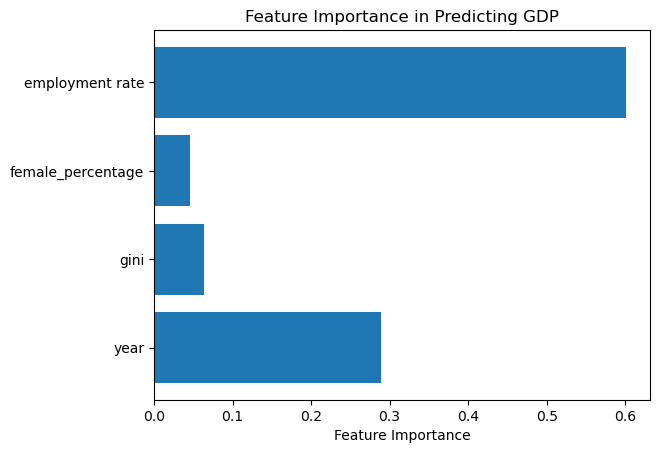

In [ ]:

label_encoder = LabelEncoder()
df['sex'] = label_encoder.fit_transform(df['sex'])  # F -> 0, M -> 1
df['profession'] = label_encoder.fit_transform(df['profession'])

# Selecting features (X) and target (y)
X = df[[ 'gini', 'female_percentage', 'employment rate']]
y = df['gdp']

# Splitting data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model: Random Forest Regressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


# Predict GDP for the next 5 years
years_to_predict = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Next 5 years

predicted_gdp = model.predict(np.hstack([years_to_predict, np.full((5, 1), 1), np.full((5, 1), 1), np.full((5, 1), 1000)]))  # Example values for 'sex', 'profession', and 'income'

# Output predictions
for year, gdp in zip(range(1, 6), predicted_gdp):
    print(f"Predicted GDP for Year {year}: {gdp:.2f}")

# Feature Importance to see which factors contribute most to GDP prediction
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting GDP")
plt.show()

Mean Absolute Error: 2.446300529565117e-09
Predicted GDP for year 106: 1049138.28
Predicted GDP for year 107: 1049138.28
Predicted GDP for year 108: 1049138.28
Predicted GDP for year 109: 1049138.28
Predicted GDP for year 110: 1049138.28


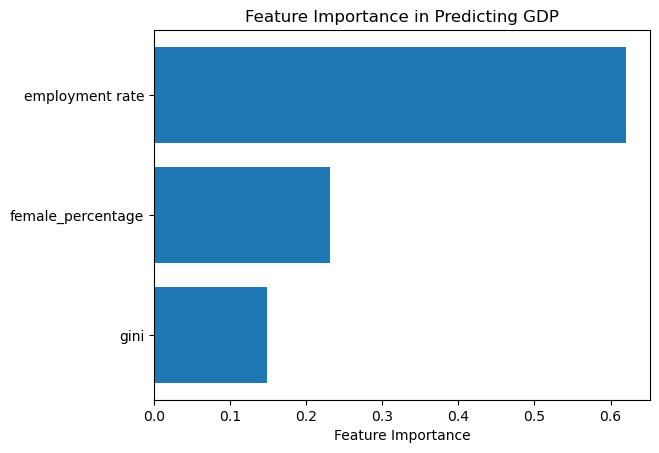

In [40]:
# Encode categorical variables
def encode_categorical_columns(df):
    le = LabelEncoder()
    df['sex'] = le.fit_transform(df['sex'])
    df['profession'] = le.fit_transform(df['profession'])
    return df

df = encode_categorical_columns(df)

# Define features and target variable
features = ['year', 'gini', 'female_percentage', 'employment rate']
target = 'gdp'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')


# Predict GDP for the next 5 years
future_years = np.arange(df['year'].max() + 1, df['year'].max() + 6)
predicted_gdp = []

for year in future_years:
    future_data = df[df['year'] == df['year'].max()].copy()
    future_data['year'] = year
    gdp_pred = model.predict(future_data[features])
    predicted_gdp.append((year, np.mean(gdp_pred)))

# Display predictions
for year, gdp in predicted_gdp:
    print(f'Predicted GDP for year {year}: {gdp:.2f}')


# Feature Importance to see which factors contribute most to GDP prediction
feature_importances = model.feature_importances_
feature_names = X.columns

# Plotting feature importance
plt.barh(feature_names, feature_importances)
plt.xlabel("Feature Importance")
plt.title("Feature Importance in Predicting GDP")
plt.show()

In [42]:

# Forecasting the next 5 years
future_years = [max(df['year']) + i for i in range(5, 10)]
future_weather = pd.DataFrame({
    'year': future_years,
    'gini': [0.66,
0.66,
0.66,
0.66,
0.66],  
    'female_percentage': [80.91666667,
0.49,
0.49,
0.49,
0.49],
    'employment rate': [0.7,
0.7,
0.7,
0.7,
0.7]  
})

# Predict GDP for future years
future_gdp_predictions = model.predict(future_weather)

# Display results
future_data['predicted gdp'] = future_gdp_predictions
print(future_data)


ValueError: Length of values (5) does not match length of index (501)

In [36]:

# Encode categorical variables
def encode_categorical_columns(df):
    le = LabelEncoder()
    df['sex'] = le.fit_transform(df['sex'])
    df['profession'] = le.fit_transform(df['profession'])
    return df

df = encode_categorical_columns(df)

# Define features and target variable
features = ['year', 'sex', 'profession', 'income', 'age', 'avg_income_per_profession', 'gini', 'female_percentage', 'employment rate']
target = 'gdp'

X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate model
predictions = model.predict(X_test)
mae = mean_absolute_error(y_test, predictions)
print(f'Mean Absolute Error: {mae}')

# Function to predict GDP for future years with new feature data
def predict_future_gdp(model, df, future_years, features):
    future_data = df[df['year'] == df['year'].max()].copy()
    predicted_gdp = []

    for year in future_years:
        future_data['year'] = year
        # You may want to update the future values of other columns dynamically based on specific trends
        gdp_pred = model.predict(future_data[features])
        predicted_gdp.append((year, np.mean(gdp_pred)))

    return predicted_gdp

# Generate next 5 years' data (assuming estimates for future factors are available)
future_years = np.arange(df['year'].max() + 1, df['year'].max() + 6)

# Predict GDP for future years
predicted_gdp = predict_future_gdp(model, df, future_years, features)

# Display predictions
for year, gdp in predicted_gdp:
    print(f'Predicted GDP for year {year}: {gdp:.2f}')





Mean Absolute Error: 1.97363820859345e-09
Predicted GDP for year 106: 1049138.28
Predicted GDP for year 107: 1049138.28
Predicted GDP for year 108: 1049138.28
Predicted GDP for year 109: 1049138.28
Predicted GDP for year 110: 1049138.28
